In [2]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [3]:
filepath = "Resources/SeoulSKAQI.csv"
SoKoAQIDF = pd.read_csv(filepath , delimiter=", ")

In [4]:
SoKoAQIDF["date"] = SoKoAQIDF["date"].astype(str)
SoKoAQIDF

,date,pm25,pm10,o3,no2,so2,co
0,2020/7/2,47.0,54.0,67.0,21.0,3,6.0
1,2020/7/3,124.0,38.0,32.0,19.0,4,5.0
2,2020/7/4,87.0,24.0,46.0,14.0,3,4.0
3,2020/7/5,65.0,31.0,57.0,14.0,3,5.0
4,2020/7/6,88.0,27.0,51.0,19.0,3,4.0
...,...,...,...,...,...,...,...
2330,2014/3/29,NaN,93.0,22.0,50.0,9,7.0
2331,2014/3/30,NaN,53.0,44.0,26.0,7,5.0
2332,2014/3/31,NaN,38.0,23.0,65.0,9,8.0
2333,2014/4/1,NaN,61.0,20.0,77.0,10,9.0


In [5]:
SoKoAQIDF[["year","month","day"]] = SoKoAQIDF["date"].str.split("/", n=2, expand=True)
SoKoAQIDF

,date,pm25,pm10,o3,no2,so2,co,year,month,day
0,2020/7/2,47.0,54.0,67.0,21.0,3,6.0,2020,7,2
1,2020/7/3,124.0,38.0,32.0,19.0,4,5.0,2020,7,3
2,2020/7/4,87.0,24.0,46.0,14.0,3,4.0,2020,7,4
3,2020/7/5,65.0,31.0,57.0,14.0,3,5.0,2020,7,5
4,2020/7/6,88.0,27.0,51.0,19.0,3,4.0,2020,7,6
...,...,...,...,...,...,...,...,...,...,...
2330,2014/3/29,NaN,93.0,22.0,50.0,9,7.0,2014,3,29
2331,2014/3/30,NaN,53.0,44.0,26.0,7,5.0,2014,3,30
2332,2014/3/31,NaN,38.0,23.0,65.0,9,8.0,2014,3,31
2333,2014/4/1,NaN,61.0,20.0,77.0,10,9.0,2014,4,1


In [6]:
SoKoAQIDF["month"] = SoKoAQIDF["month"].astype(int)
SoKoAQIDF["year"] = SoKoAQIDF["year"].astype(int)
SoKoAQIDF = SoKoAQIDF[SoKoAQIDF["month"] < 8]
SoKoAQIDF["month"] = SoKoAQIDF["month"].astype(str)
SoKoAQIDF

,date,pm25,pm10,o3,no2,so2,co,year,month,day
0,2020/7/2,47.0,54.0,67.0,21.0,3,6.0,2020,7,2
1,2020/7/3,124.0,38.0,32.0,19.0,4,5.0,2020,7,3
2,2020/7/4,87.0,24.0,46.0,14.0,3,4.0,2020,7,4
3,2020/7/5,65.0,31.0,57.0,14.0,3,5.0,2020,7,5
4,2020/7/6,88.0,27.0,51.0,19.0,3,4.0,2020,7,6
...,...,...,...,...,...,...,...,...,...,...
2330,2014/3/29,NaN,93.0,22.0,50.0,9,7.0,2014,3,29
2331,2014/3/30,NaN,53.0,44.0,26.0,7,5.0,2014,3,30
2332,2014/3/31,NaN,38.0,23.0,65.0,9,8.0,2014,3,31
2333,2014/4/1,NaN,61.0,20.0,77.0,10,9.0,2014,4,1


In [7]:
SoKo2017AQIDF = SoKoAQIDF[SoKoAQIDF["year"] == 2017]
SoKo2017AQIDF.dropna(subset=["pm25"], inplace=True)
SoKo2017AQIDF.drop(columns=["pm10", "o3", "no2","so2","co","date","year","day"], inplace=True)
SoKo2017AQIDF.reset_index(drop=True, inplace=True)
AQI2017 = []

for value in SoKo2017AQIDF["pm25"]:
    if value > 0 and value <= 12:
        AQI2017.append((((50-0)/(12 - 0))*(value - 0)) + 0)
    elif value >= 12.1 and value <= 35.4:
        AQI2017.append((((100 - 51)/(35.4 - 12.1))*(value - 12.1)) + 51)
    elif value >= 35.5 and value <= 55.4:
        AQI2017.append((((150 - 101)/(55.4 - 35.5))*(value - 35.5)) + 101)
    elif value >= 55.5 and value <= 150.4:
        AQI2017.append((((200 - 151)/(150.4- 55.4))*(value - 55.5)) + 151)
    elif value >= 150.5 and value <= 250.4:
        AQI2017.append((((300 - 201)/(250.4 - 150.5))*(value - 150.5)) + 201)
    elif value >= 250.5 and value <= 350.4:
        AQI2017.append((((400 - 301)/(350.4 - 250.5))*(value - 250.5)) + 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2017.append((((500 - 401)/(500.4 - 350.5))*(value - 350.5)) + 401)
    else:
        AQI2017.append("invalid")
#Add list to data frame, then drop rows with invalid values
SoKo2017AQIDF["AQI"] = AQI2017
SoKo2017AQIDF = SoKo2017AQIDF[SoKo2017AQIDF["AQI"] != "invalid" ]
#round it up
SoKo2017AQIDF["AQI"] = [round(i) for i in SoKo2017AQIDF["AQI"]]

SoKo2017 = SoKo2017AQIDF.groupby(["month"]).mean()
SoKo2017.rename(columns={"AQI":"2017 Mean AQI"},index={"1":"Jan", "2":"Feb", "3":"March", "4":"April", "5":"May", "6":"June", "7":"July"}, inplace=True)
SoKo2017.drop(["pm25"], axis=1, inplace=True)
SoKo2017 = SoKo2017.astype(int)
SoKo2017

,2017 Mean AQI
month,
Jan,176
Feb,173
March,187
April,169
May,167
June,159
July,162


In [8]:
SoKo2018AQIDF = SoKoAQIDF[SoKoAQIDF["year"] == 2018]
SoKo2018AQIDF.dropna(subset=["pm25"], inplace=True)
SoKo2018AQIDF.drop(columns=["pm10", "o3", "no2","so2","co","date","year","day"], inplace=True)
SoKo2018AQIDF.reset_index(drop=True, inplace=True)
AQI2018 = []

for value in SoKo2018AQIDF["pm25"]:
    if value > 0 and value <= 12:
        AQI2018.append((((50-0)/(12 - 0))*(value - 0)) + 0)
    elif value >= 12.1 and value <= 35.4:
        AQI2018.append((((100 - 51)/(35.4 - 12.1))*(value - 12.1)) + 51)
    elif value >= 35.5 and value <= 55.4:
        AQI2018.append((((150 - 101)/(55.4 - 35.5))*(value - 35.5)) + 101)
    elif value >= 55.5 and value <= 150.4:
        AQI2018.append((((200 - 151)/(150.4- 55.4))*(value - 55.5)) + 151)
    elif value >= 150.5 and value <= 250.4:
        AQI2018.append((((300 - 201)/(250.4 - 150.5))*(value - 150.5)) + 201)
    elif value >= 250.5 and value <= 350.4:
        AQI2018.append((((400 - 301)/(350.4 - 250.5))*(value - 250.5)) + 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2018.append((((500 - 401)/(500.4 - 350.5))*(value - 350.5)) + 401)
    else:
        AQI2018.append("invalid")
#Add list to data frame, then drop rows with invalid values
SoKo2018AQIDF["AQI"] = AQI2018
SoKo2018AQIDF = SoKo2018AQIDF[SoKo2018AQIDF["AQI"] != "invalid" ]
#round it up
SoKo2018AQIDF["AQI"] = [round(i) for i in SoKo2018AQIDF["AQI"]]

SoKo2018 = SoKo2018AQIDF.groupby(["month"]).mean()
SoKo2018.rename(columns={"AQI":"2018 Mean AQI"},index={"1":"Jan", "2":"Feb", "3":"March", "4":"April", "5":"May", "6":"June", "7":"July"}, inplace=True)
SoKo2018.drop(["pm25"], axis=1, inplace=True)
SoKo2018 = SoKo2018.astype(int)
SoKo2018

,2018 Mean AQI
month,
Jan,170
Feb,171
March,170
April,161
May,158
June,162
July,140


In [9]:
SoKo2019AQIDF = SoKoAQIDF[SoKoAQIDF["year"] == 2019]
SoKo2019AQIDF.dropna(subset=["pm25"], inplace=True)
SoKo2019AQIDF.drop(columns=["pm10", "o3", "no2","so2","co","date","year","day"], inplace=True)
SoKo2019AQIDF.reset_index(drop=True, inplace=True)
AQI2019 = []

for value in SoKo2019AQIDF["pm25"]:
    if value > 0 and value <= 12:
        AQI2019.append((((50-0)/(12 - 0))*(value - 0)) + 0)
    elif value >= 12.1 and value <= 35.4:
        AQI2019.append((((100 - 51)/(35.4 - 12.1))*(value - 12.1)) + 51)
    elif value >= 35.5 and value <= 55.4:
        AQI2019.append((((150 - 101)/(55.4 - 35.5))*(value - 35.5)) + 101)
    elif value >= 55.5 and value <= 150.4:
        AQI2019.append((((200 - 151)/(150.4- 55.4))*(value - 55.5)) + 151)
    elif value >= 150.5 and value <= 250.4:
        AQI2019.append((((300 - 201)/(250.4 - 150.5))*(value - 150.5)) + 201)
    elif value >= 250.5 and value <= 350.4:
        AQI2019.append((((400 - 301)/(350.4 - 250.5))*(value - 250.5)) + 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2019.append((((500 - 401)/(500.4 - 350.5))*(value - 350.5)) + 401)
    else:
        AQI2019.append("invalid")
#Add list to data frame, then drop rows with invalid values
SoKo2019AQIDF["AQI"] = AQI2019
SoKo2019AQIDF = SoKo2019AQIDF[SoKo2019AQIDF["AQI"] != "invalid" ]
#round it up
SoKo2019AQIDF["AQI"] = [round(i) for i in SoKo2019AQIDF["AQI"]]

SoKo2019 = SoKo2019AQIDF.groupby(["month"]).mean()
SoKo2019.rename(columns={"AQI":"2019 Mean AQI"},index={"1":"Jan", "2":"Feb", "3":"March", "4":"April", "5":"May", "6":"June", "7":"July"}, inplace=True)
SoKo2019.drop(["pm25"], axis=1, inplace=True)
SoKo2019 = SoKo2019.astype(int)
SoKo2019

,2019 Mean AQI
month,
Jan,181
Feb,180
March,189
April,158
May,173
June,150
July,141


In [10]:
SoKo2020AQIDF = SoKoAQIDF[SoKoAQIDF["year"] == 2020]
SoKo2020AQIDF.dropna(subset=["pm25"], inplace=True)
SoKo2020AQIDF.drop(columns=["pm10", "o3", "no2","so2","co","date","year","day"], inplace=True)
SoKo2020AQIDF.reset_index(drop=True, inplace=True)
AQI2020 = []

for value in SoKo2020AQIDF["pm25"]:
    if value > 0 and value <= 12:
        AQI2020.append((((50-0)/(12 - 0))*(value - 0)) + 0)
    elif value >= 12.1 and value <= 35.4:
        AQI2020.append((((100 - 51)/(35.4 - 12.1))*(value - 12.1)) + 51)
    elif value >= 35.5 and value <= 55.4:
        AQI2020.append((((150 - 101)/(55.4 - 35.5))*(value - 35.5)) + 101)
    elif value >= 55.5 and value <= 150.4:
        AQI2020.append((((200 - 151)/(150.4- 55.4))*(value - 55.5)) + 151)
    elif value >= 150.5 and value <= 250.4:
        AQI2020.append((((300 - 201)/(250.4 - 150.5))*(value - 150.5)) + 201)
    elif value >= 250.5 and value <= 350.4:
        AQI2020.append((((400 - 301)/(350.4 - 250.5))*(value - 250.5)) + 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2020.append((((500 - 401)/(500.4 - 350.5))*(value - 350.5)) + 401)
    else:
        AQI2020.append("invalid")
#Add list to data frame, then drop rows with invalid values
SoKo2020AQIDF["AQI"] = AQI2020
SoKo2020AQIDF = SoKo2020AQIDF[SoKo2020AQIDF["AQI"] != "invalid" ]
#round it up
SoKo2020AQIDF["AQI"] = [round(i) for i in SoKo2020AQIDF["AQI"]]

SoKo2020 = SoKo2020AQIDF.groupby(["month"]).mean()
SoKo2020.rename(columns={"AQI":"2020 Mean AQI"},index={"1":"Jan", "2":"Feb", "3":"March", "4":"April", "5":"May", "6":"June", "7":"July"}, inplace=True)
SoKo2020.drop(["pm25"], axis=1, inplace=True)
SoKo2020 = SoKo2020.astype(int)
SoKo2020

,2020 Mean AQI
month,
Jan,163
Feb,165
March,162
April,156
May,146
June,161
July,126


In [11]:
SoKoDF = pd.concat([SoKo2017, SoKo2018, SoKo2019, SoKo2020], axis=1)
SoKoDF.to_csv("FinalCityCSV/SeoulSouthKoreaFinalDF.csv")
SoKoDF

,2017 Mean AQI,2018 Mean AQI,2019 Mean AQI,2020 Mean AQI
month,,,,
Jan,176,170,181,163
Feb,173,171,180,165
March,187,170,189,162
April,169,161,158,156
May,167,158,173,146
June,159,162,150,161
July,162,140,141,126


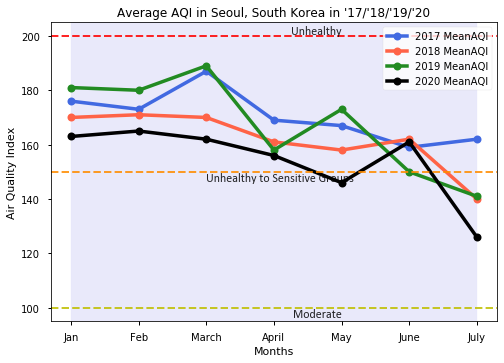

In [15]:
#plot some stuff bruh
plt.style.use('seaborn-notebook')
plt.plot(SoKoDF["2017 Mean AQI"], color="royalblue", marker="o", linewidth=3.5, markersize=8, label="2017 MeanAQI")
plt.plot(SoKoDF["2018 Mean AQI"], color="tomato", marker="o", linewidth=3.5, markersize=8, label="2018 MeanAQI")
plt.plot(SoKoDF["2019 Mean AQI"], color="forestgreen", marker="o", linewidth=3.5, markersize=8, label="2019 MeanAQI")
plt.plot(SoKoDF["2020 Mean AQI"], color="black", marker="o", linewidth=3.5, markersize=8, label="2020 MeanAQI")
#plt.axhline(y=301,color='m', alpha=.5, linestyle='--', lw=2)
#plt.text(6,301,'Very Unhealthy', ha='right', va='top', fontsize=12, family='calibri', alpha=.5)
plt.axhline(y=200,color='r', alpha=.85, linestyle='--', lw=2)
plt.text(4,200,'Unhealthy', ha='right', va='bottom', fontsize=12,family='calibri',alpha=.85)
plt.axhline(y=150,color='darkorange', alpha=.85, linestyle='--', lw=2)
plt.text(2,150,'Unhealthy to Sensitive Groups', ha='left', va='top', fontsize=12,family='calibri',alpha=.85)
plt.axhline(y=100,color='y', alpha=.85, linestyle='--', lw=2)
plt.text(4,100,'Moderate', ha='right', va='top', fontsize=12,family='calibri',alpha=.85)
#plt.axhline(y=50,color='g', alpha=.5, linestyle='--', lw=2)
#plt.text(6,50,'Good', ha='right', va='top', fontsize=12,family='calibri',alpha=.5)
plt.title("Average AQI in Seoul, South Korea in '17/'18/'19/'20")
plt.ylabel("Air Quality Index")
plt.xlabel("Months")
#Make objects for legend to pick up and describe background
#Need data for arguments
x = np.arange(7)
y1 = 205
y2 = 95
#y3 = 100
plt.fill_between(x, y1, y2, where = y1 > y2,  color="lavender", alpha = 0.85)

#limit the y axis
plt.ylim(95,205)
#plt.fill_between(x, y2, y3, where = y2 > y3,  color="orange", alpha = 0.35, label="Warning4SensitiveGrps")
#backleg = [Patch(facecolor="red", label="Unhealthy"), Patch(facecolor="orange", label="Warning4SensitiveGrps")]
plt.legend(loc="best")
#bins = [0,50,100,150,200,300,500]
#quality = ["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous"]


plt.savefig("SavedFigures/SeoulAQI.png")

In [16]:
pwd

'c:\\Users\\goroq\\Documents\\Data\\project-one'